# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [17]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
current_btc = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
current_eth = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * current_btc
my_eth_value = my_eth * current_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51883.20
The current value of your 5.3 ETH is $15832.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [37]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [19]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [29]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-09-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    limit=1000
).df

# Preview DataFrame
df_ticker

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-09-20 00:00:00-04:00  116.02  116.17  115.975  116.12  4463038  434.88   

                                                              
                             high     low   close     volume  
time                                                          
2021-09-20 00:00:00-04:00  436.56  428.86  434.07  149948277

In [35]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker['AGG']['close'])
spy_close_price = float(df_ticker['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.12
Current SPY closing price: $434.07


In [38]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21703.50
The current value of your 200 AGG shares is $23224.00


### Savings Health Analysis

In [44]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
savings = {'amount': [crypto, shares]}
assets = ['Crypto', 'Shares']
df_savings = pd.DataFrame(savings, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,67715.89
Shares,44927.50


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

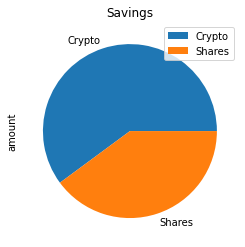

In [48]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Savings')

In [49]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal and have enough money in your emergency fund.")
else:
    print(f"You need ${(emergency_fund-total_savings)} to reach your emergency fund goal of ${(emergency_fund)}.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [50]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
timeframe = '1D'
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [58]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [59]:
# Printing the simulation input data
mc.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [60]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017330,1.002687,0.999293,0.991333,0.997235,1.005573,0.988995,1.003894,1.010864,1.003859,...,1.020082,1.003730,1.004790,0.991573,0.999604,0.989746,0.996700,1.012989,0.986710,0.998690
2,1.026272,1.005774,0.995032,0.992968,1.001777,0.996205,0.983098,0.998617,1.006779,1.011654,...,1.017412,1.009932,0.990009,0.997939,0.979305,1.000505,0.995160,1.029708,0.992455,0.997715
3,1.030315,1.000561,0.996425,0.992727,1.003264,0.998624,0.982629,1.001209,0.999143,1.012624,...,1.017188,1.008216,0.993283,1.007583,0.985152,1.006914,0.998657,1.041577,0.998125,1.002645
4,1.026592,1.002198,1.000916,1.003298,0.997915,1.001234,0.975141,1.022380,1.007116,1.009888,...,1.017769,1.007153,1.000959,1.017990,0.990682,1.002080,0.997976,1.051291,1.004692,0.999003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.348878,18.181499,25.064087,10.506723,28.318041,16.624348,9.379333,33.964348,10.196439,20.766189,...,39.807206,41.787029,3.672011,15.316698,38.921080,5.843716,18.883644,12.725047,18.890037,26.616937
7557,16.565170,18.266549,24.629126,10.550320,28.405625,16.768395,9.289147,34.220761,10.051966,20.798755,...,40.098984,41.993536,3.723608,15.317217,38.856110,5.786561,18.818416,12.706780,18.897062,26.284095
7558,16.510199,18.323022,24.809598,10.453886,28.462734,16.514633,9.281084,34.089246,9.995567,21.031104,...,40.844898,42.003625,3.739355,15.542825,38.569425,5.769981,18.701677,12.746235,18.779303,26.289620
7559,16.470789,18.356630,24.914480,10.364079,28.740192,16.597104,9.169355,34.082261,9.972525,21.004796,...,40.469489,42.208343,3.712000,15.580230,39.220975,5.783656,18.660684,12.796132,18.928430,26.073640


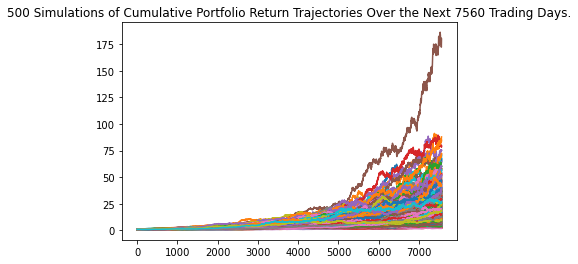

In [62]:
# Plot simulation outcomes
sim_plot = mc.plot_simulation()

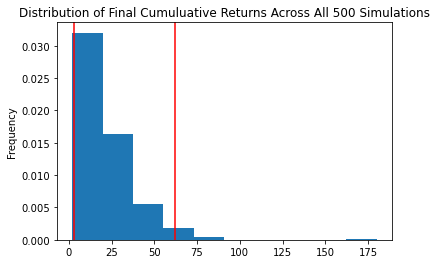

In [63]:
# Plot probability distribution and confidence intervals
prob_dist = mc.plot_distribution()

### Retirement Analysis

In [83]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stats = mc.summarize_cumulative_return()

# Print summary statistics
mc_stats

count           500.000000
mean             22.009945
std              16.465427
min               1.948852
25%              11.393134
50%              17.442428
75%              29.286654
max             179.973186
95% CI Lower      3.244533
95% CI Upper     62.090318
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [73]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(mc_stats[9]*initial_investment,2)
ci_lower= round(mc_stats[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64890.67 and $1241806.36


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [74]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper_2 = round(mc_stats[9]*initial_investment_2,2)
ci_lower_2= round(mc_stats[8]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $97336.0 and $1862709.54


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_retire = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [76]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_retire.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996223,1.008972,1.013386,0.997185,0.989905,1.008375,0.996995,1.000103,1.004215,0.994333,...,1.013288,0.992270,1.014546,1.003089,1.005675,0.990957,0.997455,0.998412,1.001715,1.008000
2,0.993110,1.001010,1.016145,0.997298,0.982989,1.001043,0.992757,1.005400,0.990762,0.993447,...,0.992121,0.989245,1.013554,1.005222,1.000270,0.981073,0.992672,1.003697,0.995780,1.006338
3,0.996267,1.009626,1.011683,1.013608,0.975163,1.011663,1.015662,1.005204,0.996867,0.996850,...,0.989469,0.995808,1.012957,1.000382,1.004777,0.983750,0.991929,0.993299,0.985386,1.004418
4,0.989205,1.008149,1.000175,1.005247,0.974472,1.014255,1.010331,1.004061,1.010214,0.994780,...,0.971700,1.002633,1.008678,1.005350,1.002972,0.986808,0.992826,0.995505,0.992470,1.010880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.268354,1.637239,1.250308,1.191796,1.353448,1.683443,2.324871,1.326120,1.354443,1.233037,...,1.384455,2.151312,1.837579,1.897458,1.552128,1.986004,1.328000,1.128799,1.431581,2.125608
1257,2.262900,1.635791,1.260938,1.190036,1.346885,1.696167,2.302048,1.329303,1.372301,1.246923,...,1.366141,2.168616,1.829897,1.884354,1.562656,2.013117,1.307885,1.141620,1.434630,2.095765
1258,2.253587,1.617014,1.260732,1.186923,1.357586,1.705979,2.297860,1.334023,1.370803,1.249013,...,1.347630,2.155133,1.822765,1.887894,1.568582,2.010846,1.309517,1.161281,1.444575,2.128300
1259,2.239575,1.609931,1.261602,1.182187,1.339436,1.710165,2.314199,1.337218,1.367073,1.247537,...,1.360245,2.140820,1.867419,1.876428,1.567465,1.996366,1.292784,1.169220,1.437824,2.139406


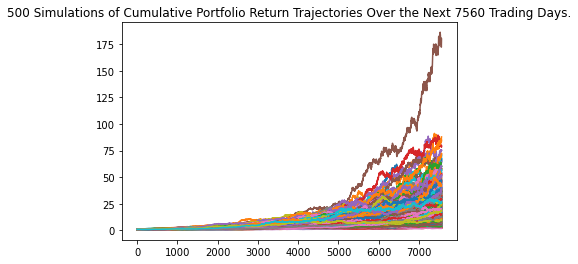

In [77]:
# Plot simulation outcomes
retire_sim_plot = mc.plot_simulation()

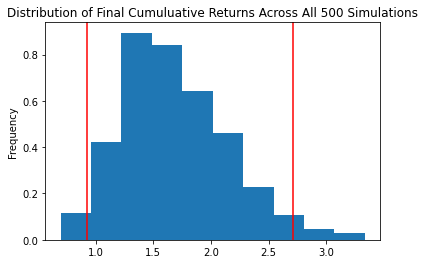

In [80]:
# Plot probability distribution and confidence intervals
retire_plot = mc_retire.plot_distribution()

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
retire_summary = mc_retire.summarize_cumulative_return()

# Print summary statistics
retire_summary

count           500.000000
mean              1.689264
std               0.463641
min               0.696058
25%               1.356581
50%               1.591056
75%               1.985388
max               3.334478
95% CI Lower      0.922885
95% CI Upper      2.710778
Name: 1260, dtype: float64

In [86]:
# Set initial investment
initial_investment_retire = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five_retire = round(mc_stats[9]*initial_investment_retire,2)
ci_lower_five_retire= round(mc_stats[8]*initial_investment_retire,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_retire} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_retire} and ${ci_upper_five_retire}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $64890.67 and $1241806.36


### Ten Years Retirement Option

In [87]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_retire_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [88]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_retire_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008588,0.997540,1.009837,1.004331,0.988333,1.012087,1.013413,0.995619,0.995914,0.992433,...,0.979030,0.997915,1.013792,1.001296,0.993622,0.997802,1.001198,1.007616,1.024300,1.007301
2,1.002018,1.003175,1.016108,1.002575,0.990293,1.004371,1.018407,0.994625,0.986293,0.985477,...,0.986283,0.992681,1.012965,0.994389,0.993588,0.985532,1.003997,1.008373,1.026994,1.003162
3,0.985897,1.003826,1.007358,1.001073,0.987925,1.003134,1.006560,0.991540,0.979296,0.998723,...,0.985532,0.993989,1.017254,0.984395,0.976783,0.998327,1.004878,0.999434,1.016249,1.004611
4,0.976129,1.008679,1.024152,0.997690,0.973926,1.007354,1.012766,0.994806,0.966069,0.998858,...,0.999205,1.011443,1.014073,0.985403,0.975900,0.997613,0.994422,0.995754,1.010085,1.007148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.034832,6.063182,2.072232,3.086964,2.446063,4.639799,1.973090,2.855874,3.591892,2.498309,...,5.253135,2.190728,1.634881,1.263932,5.149768,1.060383,3.238414,4.912314,2.481741,2.768995
2517,1.030680,6.046527,2.074902,3.077180,2.483917,4.696204,1.966529,2.866650,3.596145,2.484482,...,5.269091,2.196758,1.628910,1.269676,5.138272,1.067139,3.247558,4.877653,2.470390,2.795160
2518,1.025631,6.014723,2.082551,3.061110,2.453126,4.716554,1.956312,2.872154,3.552394,2.503563,...,5.270900,2.196394,1.637624,1.277050,5.218095,1.068861,3.245770,4.879199,2.484106,2.758387
2519,1.030812,5.956645,2.058263,3.046585,2.460334,4.718350,1.945602,2.842468,3.546854,2.482506,...,5.244541,2.196209,1.644748,1.282434,5.252295,1.061122,3.289180,4.883158,2.509505,2.757880


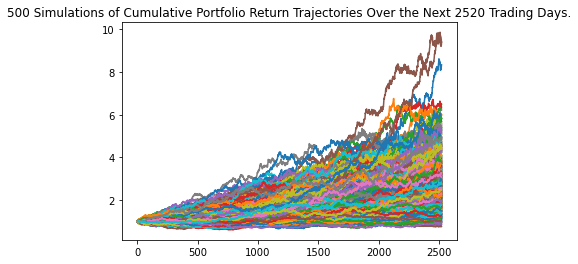

In [89]:
# Plot simulation outcomes
retire_plot_ten = mc_retire_ten.plot_simulation()

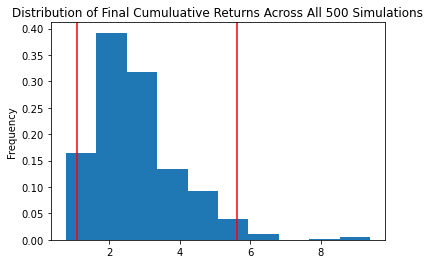

In [90]:
# Plot probability distribution and confidence intervals
ten_dist_plot = mc_retire_ten.plot_distribution()

In [91]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_retire_ten = mc_retire_ten.summarize_cumulative_return()

# Print summary statistics
summary_retire_ten

count           500.000000
mean              2.784552
std               1.225625
min               0.776344
25%               1.906185
50%               2.565586
75%               3.343173
max               9.398146
95% CI Lower      1.089737
95% CI Upper      5.635814
Name: 2520, dtype: float64

In [92]:
# Set initial investment
initial_investment_ten = 30000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five_ten = round(mc_stats[9]*initial_investment_ten,2)
ci_lower_five_ten= round(mc_stats[8]*initial_investment_ten,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_five_ten} and ${ci_upper_five_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $97336.0 and $1862709.54
